## Start R code here

In [67]:
## Functions to read in data

In [68]:
read_r2_matrix <- function(r2_path){
    r2_df = read.table(r2_path, sep="\t", )
    r2_matrix <- data.matrix(r2_df) 
    return(r2_matrix)
}

In [69]:
get_bim <- function(bim_path){
    bim = read.table(bim_path, sep = '\t')
    names(bim) = c('chr', 'SNP', 'cm', 'bp', 'A1', 'A2')
    return(bim)
    }

In [70]:
get_fam <- function(fam_path){
    fam = read.table(fam_path, sep = ' ')
    names(fam) = c('FID', 'IID', 'fatherID', 'motherID', 'sex', 'phenotype')
    return(fam)
    }

In [71]:
estimate_Ne <- function(mean_r2, S){
    adj1_r2 = mean_r2 * (S/(S-1))**2
    adj2_r2 = adj1_r2 - 0.0018 - 0.907/S - 4.44/(S**2)
    Ne_est = (0.308 + sqrt(.308**2 - 2.08*adj2_r2))/(2*adj2_r2)
    return(Ne_est)
}

In [76]:
get_Ne <- function(base_path){
    # load files
    r2_path  = paste(base_path, '.ld', sep ='')
    bim_path = paste(base_path, '.bim', sep ='')
    fam_path = paste(base_path, '.fam', sep ='')
    pop_mat = read_r2_matrix(r2_path)
    pop_bim = get_bim(bim_path)
    pop_fam = get_fam(fam_path)
    
    # get sample size
    S = nrow(pop_fam)
    
    # print the number of loci 
    #print (dim(pop1_mat))
    # exclude loci on the same chromosome
    for (CH in 1:26){
        my_idx = which(pop_bim$chr==CH)
        pop_mat[my_idx, my_idx] <- NA
    }
    # upper triangle
    r2_vals = pop_mat[upper.tri(x = pop_mat, diag = FALSE)]
    # remove NA values
    r2_vals = r2_vals[!is.na(r2_vals)]
    
    mean_r2 = mean(r2_vals)
    
    Ne_basic = 1.0/(3*mean_r2 - 3.0/S)
    Ne_est = estimate_Ne(mean_r2=mean_r2, S=S)
    
    print(c(Ne_est, Ne_basic))
    return (list(Ne_est = Ne_est, r2_matrix = pop_mat))
}

In [77]:
my_Ne = get_Ne(base_path = "./work/Nome_ODD")
my_Ne = get_Ne(base_path = "./work/Nome_EVEN")
my_Ne = get_Ne(base_path = "./work/Koppen_ODD")
my_Ne = get_Ne(base_path = "./work/Koppen_EVEN")
my_Ne = get_Ne(base_path = "./work/Puget_ODD")
my_Ne = get_Ne(base_path = "./work/Puget_EVEN")

[1] 2014.4256  174.1473
[1] 3691.2960  125.9813
[1] 2079.5810  174.5479
[1] 9087.4632  184.6818
[1] 2934.2756  178.2407
[1] 1805.5623  172.6845


## Plot the LD matrices

In [60]:
library(lattice)

In [61]:
pal <- colorRampPalette(c("white", "red"), space = "rgb")
lp1 = levelplot(my_Ne$r2_matrix, main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = FALSE)

pop_mat = read_r2_matrix("./work/Puget_EVEN.ld")
lp2 = levelplot(pop_mat[150:250, 150:250], main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = TRUE)

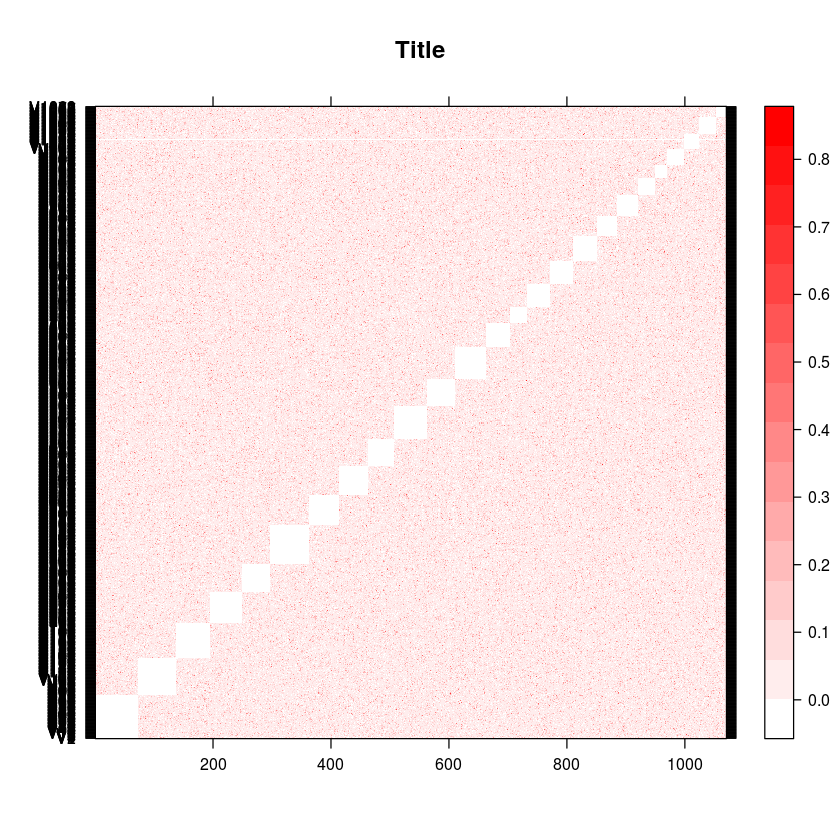

In [62]:
lp1

In [63]:
trellis.device(device="png", filename="./plots/Puget_EVEN.ld.png")
print(lp1)
dev.off()
trellis.device(device="png", filename="./plots/Puget_EVEN.raw.ld.png")
print(lp2)
dev.off()

png 
  2

png 
  2

In [64]:
# 

In [65]:
my_Ne = get_Ne(base_path = "./work/Nome_ODD")
my_Ne = get_Ne(base_path = "./work/Nome_EVEN")
my_Ne = get_Ne(base_path = "./work/Koppen_ODD")
my_Ne = get_Ne(base_path = "./work/Koppen_EVEN")
my_Ne = get_Ne(base_path = "./work/Puget_ODD")
my_Ne = get_Ne(base_path = "./work/Puget_EVEN")

[1] 2003.273
[1] 3691.296
[1] 2059.567
[1] 9087.463
[1] 2876.705
[1] 1805.562


In [66]:
my_Ne = get_Ne(base_path = "./work/Nome_ODD")
my_Ne = get_Ne(base_path = "./work/Nome_EVEN")
my_Ne = get_Ne(base_path = "./work/Koppen_ODD")
my_Ne = get_Ne(base_path = "./work/Koppen_EVEN")
my_Ne = get_Ne(base_path = "./work/Puget_ODD")
my_Ne = get_Ne(base_path = "./work/Puget_EVEN")

ERROR: Error in `[<-`(`*tmp*`, my_idx, my_idx, value = NA): subscript out of bounds


In [ ]:
pop1_mat = read_r2_matrix("./pink_data_pop_6_clean.ld")
head(pop1_mat)

In [ ]:
pop1_bim = get_bim("./pink_data_pop_1_clean.bim")
tail(pop1_bim)

In [ ]:
pop1_fam = get_fam("./pink_data_pop_1_clean.fam")
head(pop1_fam)

In [ ]:
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_1_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_2_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_3_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_4_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_5_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_6_clean")

In [ ]:
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_1_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_2_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_3_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_4_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_5_clean")
my_Ne = get_Ne(base_path = "./exercise/pink_data_pop_6_clean")

In [56]:
#library(dplyr)

In [69]:
library(ggplot2, lib.loc = '/home/ryan/anaconda2/lib/R/library/')

In [71]:
library(lattice)

In [103]:
mean(my_Ne$r2_matrix, na.rm = TRUE)

[1] 0.06253545

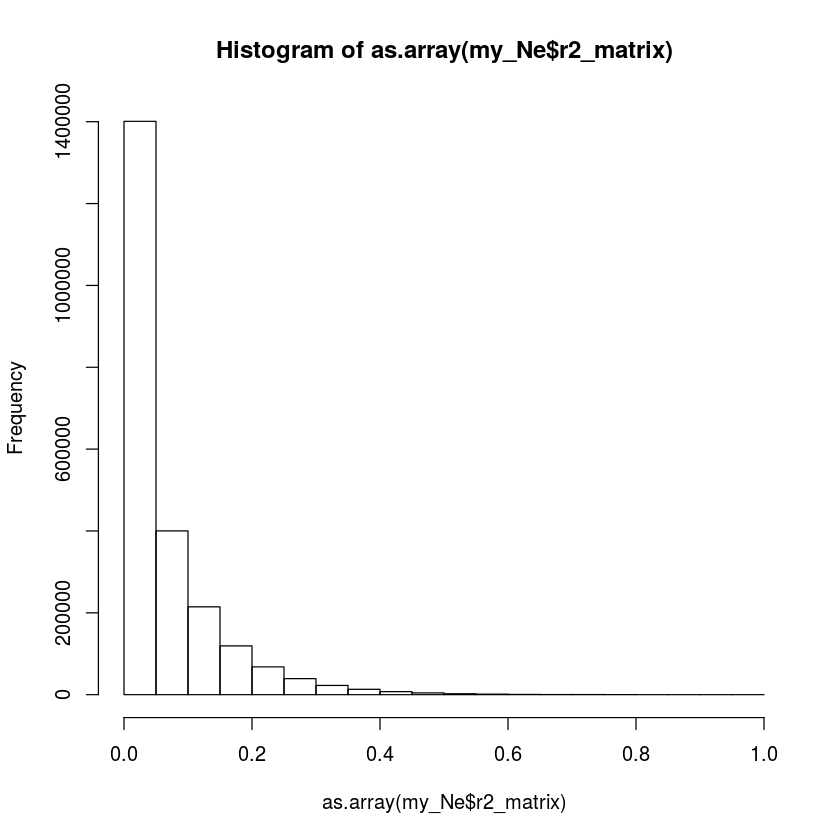

In [101]:
hist(as.array(my_Ne$r2_matrix))

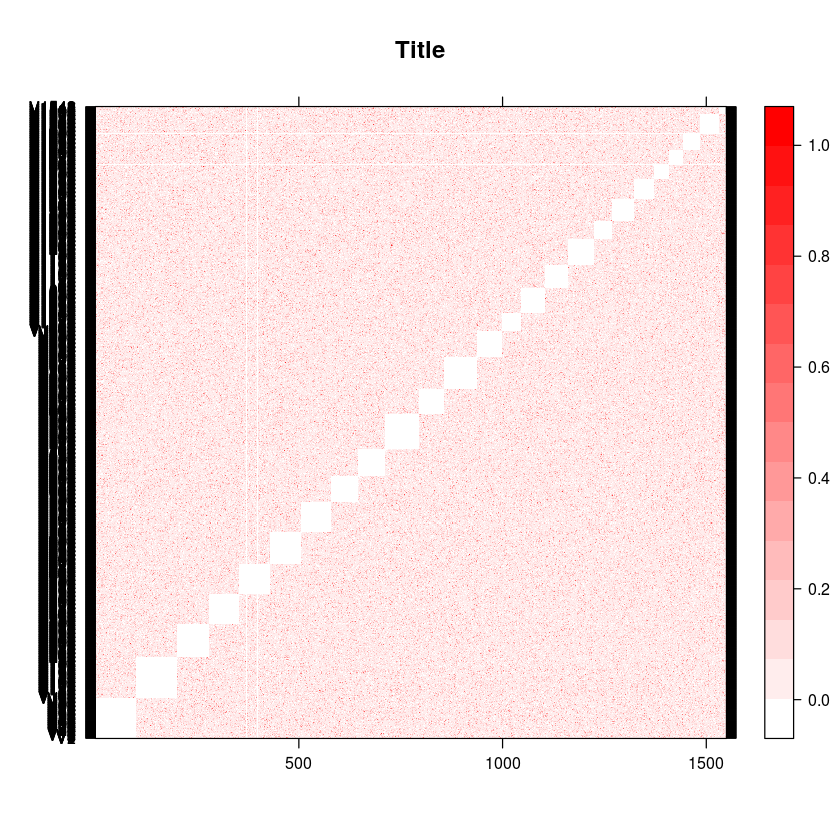

In [99]:
pal <- colorRampPalette(c("white", "red"), space = "rgb")
levelplot(my_Ne$r2_matrix, main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = FALSE)

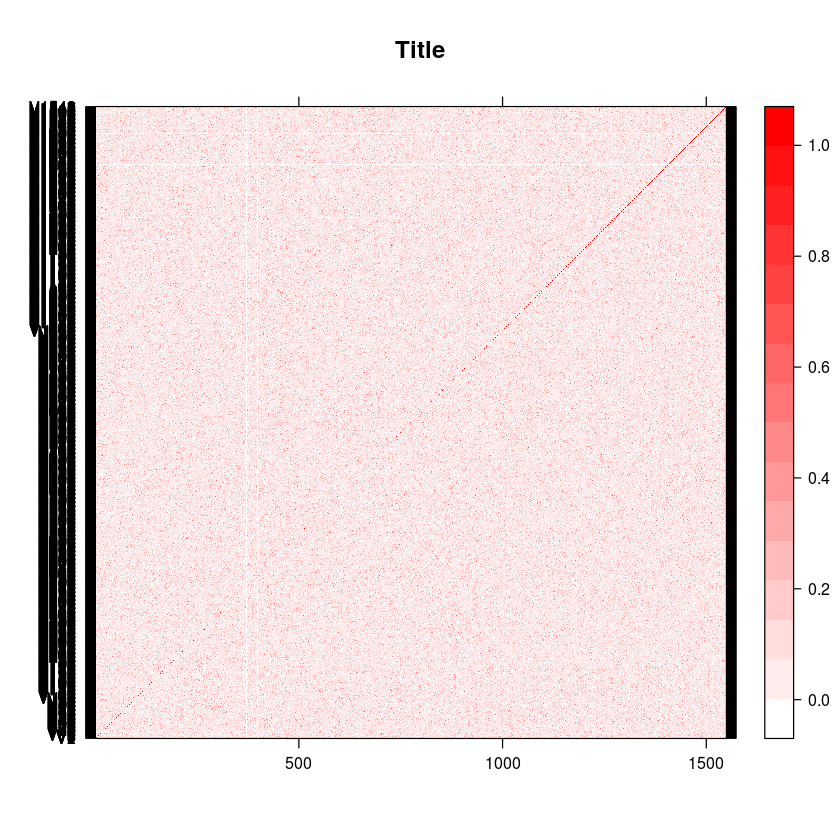

In [100]:
levelplot(read_r2_matrix('./exercise/pink_data_pop_4_clean.ld'), main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = FALSE)
